### Dataset Overview
<br> 

**Objective**

The dataset provides insights into students' lifestyles and how they are related to their levels of stress and academic performance. Their lifestyle factors include study hours, sleep duration, social hours, physical activity, extracurricular activities, and GPA. All these factors influence students' stress levels.

**Size**
* There are **2000 rows**.
* There are **8 columns**.

**Features**
* **Numerical Feature**
  - `Study_Hours_Per_Day` : Time spent on studying (hours)
  - `Sleep_Hours_Per_Day` : Time spent on sleeping (hours)
  - `Social_Hours_Per_Day` : Time spent on socializing (hours)
  - `Physical_Activity_Hours_Per_Day` : Time spent on physical activities (hours)
  - `Extracurricular_Hours_Per_Day` : Time spent on extracurricular activities (hours)
  - `GPA` : Grade Point Average representing students' academic grade
* **Categorical Feature**
  - `Stress Level` : Categorized as Low, Moderate, and High that indicates students' stress level

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ******************* Data preprocessing ********************
from sklearn.model_selection import train_test_split, StratifiedKFold

# ******************* Models ***************************
from sklearn.tree import DecisionTreeClassifier

# ******************* Metric ***********************
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# ****************** Others ************************
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('/kaggle/input/student-lifestyle-dataset/student_lifestyle_dataset.csv')
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


# EDA

In [3]:
df = df.drop(columns=['Student_ID'])
df

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,8.1,0.7,7.6,3.5,4.1,3.04,High


**Drop `Student_ID` Column**

The `Student_ID` column is dropped because it is **not relevant** for further analysis and modelling.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   GPA                              2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 109.5+ KB


In [5]:
# Checking missing values.
df.isna().sum()

Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

**Missing Values in Each Column**

There are **no missing values** in all variables.

In [6]:
df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


### Insights from the Summary

**1. Study Hours per Day & GPA**

* Students spent around **5 to 10 hours** per day studying with a high average of about **7.47 hours**. 
* Their GPAs ranged from **2.24 to 4.00** with a relatively high average of about **3.11**.
* This indicates that there might be a positive correlation between the two variables. **(this point will be checked through a correlation analysis)**

**2. Sleep Hours per Day**

* Students spent around **5 to 10 hours** per day sleeping with an average of about **7.50 hours**.
* The recommended sleep duration for people is **7 to 8 hours** per day. This shows that students generally slept well.
* Students who sleep well tend to **perform better** in their academics.

**3. Physical Activity Hours per Day**

* Students spent around **0 to 13 hours** per day doing physical activities with a very high average of about **4.32 hours**.
* The data suggests there might be a **few outliers** since some students are very active (students that spent up to 13 hours a day being active).

**4. Social Hours per Day**

* Students spent around **0 to 6 hours** per day socializing with an average of about **2.70 hours**.
* This indicates that students have **moderate social engagement** and a **good work-life balance**.

**5. Extracurricular Hours per Day**

* Students spent around **0 to 4 hours** per day doing extracurricular activities with an average of approximately **2 hours**.
* This indicates that students are involved in extracurricular activites to a **moderate extent**.

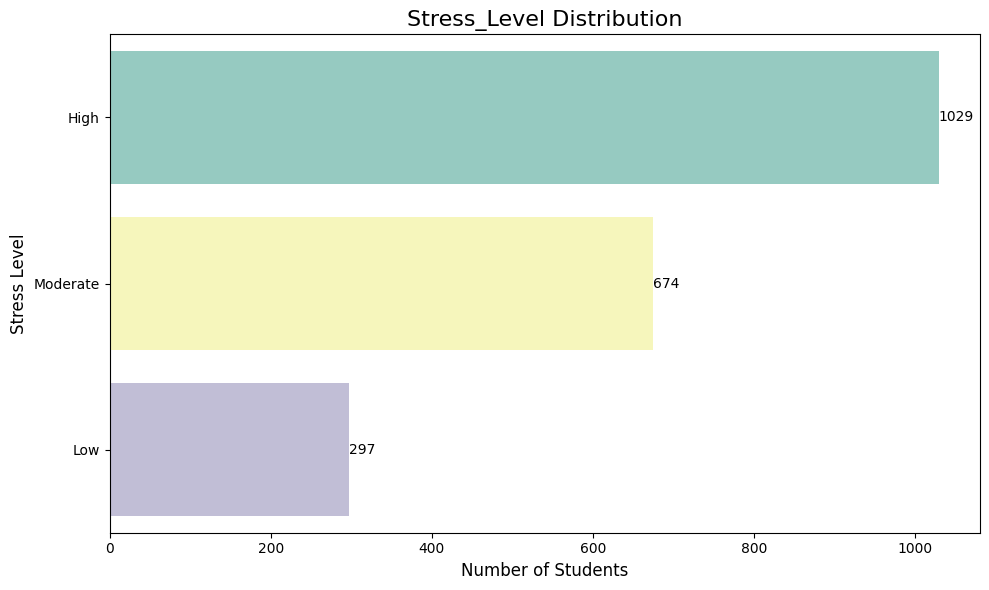

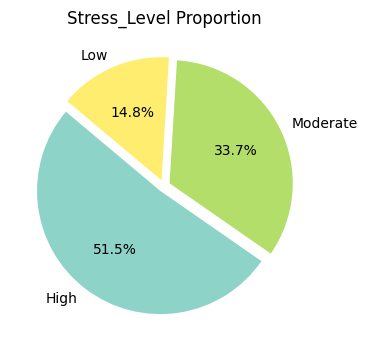

In [7]:
# 2. Hitung Jumlah Kemunculan untuk Setiap Nilai Unik
# Kita gunakan kolom 'Stress Coping Mechanisms' sebagai contoh
stress_counts = df['Stress_Level'].value_counts()

# 3. Buat Visualisasi Bar Graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=stress_counts.values, 
    y=stress_counts.index, 
    palette='Set3'
)

# 3. Tambahkan label angka di atas setiap bar
# Looping melalui setiap 'container' (setiap set bar) dan tambahkan label
for container in ax.containers: # <-- BARIS PENTING 1
    ax.bar_label(container)     # <-- BARIS PENTING 2

# 4. Tambahkan Judul dan Label
plt.title('Stress_Level Distribution', fontsize=16)
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Stress Level', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

# 2. Buat Jarak (Explode) untuk Setiap Irisan
# Kita akan membuat jarak yang sama untuk semua irisan agar terlihat rapi.
# Jumlah '0.05' harus sama dengan jumlah irisan/kategori yang ada.
num_slices = len(stress_counts)
explode_values = [0.05] * num_slices # Membuat list [0.05, 0.05, 0.05, ...]

# 3. Buat Daftar Warna Kustom
# Kita bisa menggunakan 'colormap' dari Matplotlib untuk menghasilkan
# daftar warna yang serasi secara otomatis.
cmap = plt.get_cmap('Set3') # Anda bisa ganti 'viridis' dengan 'plasma', 'inferno', 'tab20', dll.
colors_list = cmap(np.linspace(0, 1, num_slices))

# 3. Buat Visualisasi Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(
    stress_counts, 
    labels=stress_counts.index, 
    autopct='%1.1f%%',  # Format untuk menampilkan persentase
    startangle=140,     # Sudut awal agar tampilan lebih rapi
    explode=explode_values,  # <-- Parameter untuk jarak
    colors=colors_list 
)

# 4. Tambahkan Judul
plt.title('Stress_Level Proportion', fontsize=12)
plt.ylabel('') # Menghilangkan label 'ylabel' yang tidak perlu

# Menampilkan plot
plt.show()

### Insights from The Distribution and Proportion of `Stress_Level`

* Most students' stress level are categorized as **High**, which reached about **51.5%** out of 2000 students (a total of **1029 students**). More than half of the students experience **high** stress level which could be caused by their lifestyle or academic outcome.
* The second most frequent stress level is **Moderate**, which reached about **33.7%** out of 2000 students (a total of **674 students**). About a third of the students have **moderate** stress level which means they might have a well-balanced lifestyle.
* Least students' stress level are categorized as **Low**, which only reached about **14.8%** out of 2000 students (a total of **297 students**). Only a minority of students experience **low** stress level which means they have quite a stress-free life.

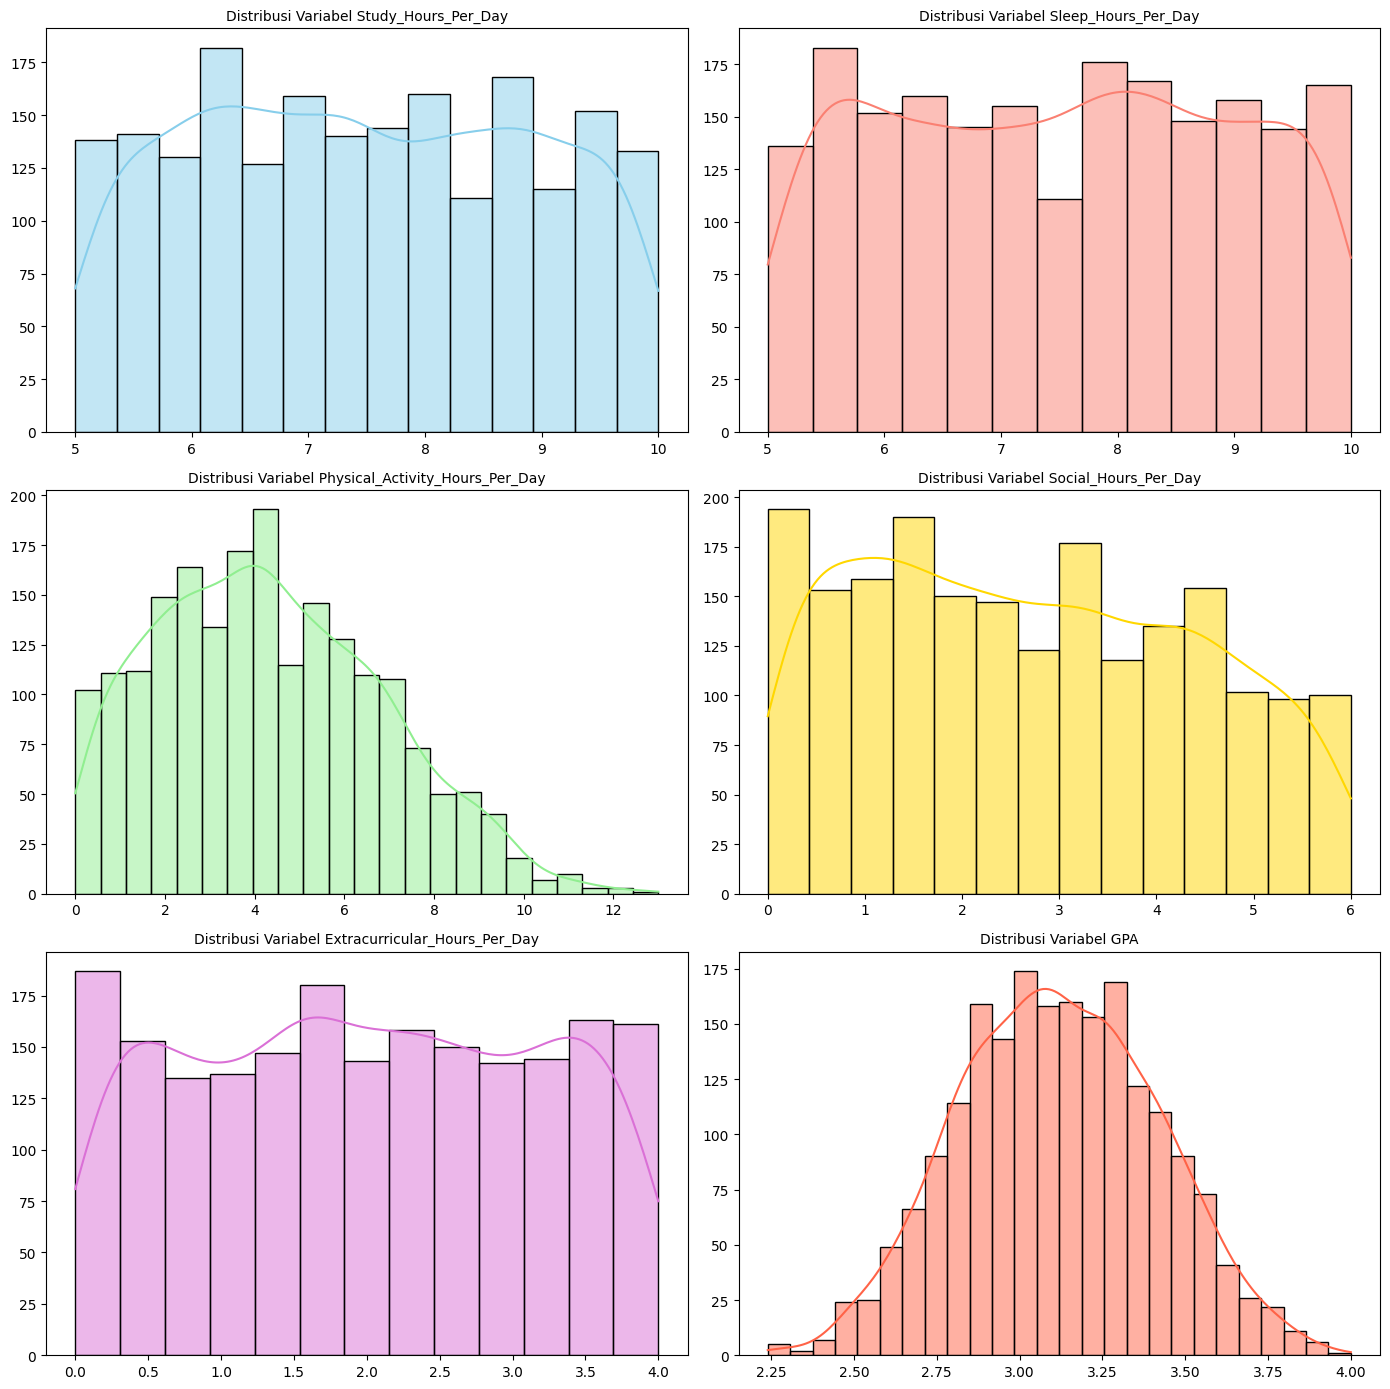

In [8]:
# Daftar fitur numerik
numerical_features = [
    'Study_Hours_Per_Day',
    'Sleep_Hours_Per_Day',
    'Physical_Activity_Hours_Per_Day',
    'Social_Hours_Per_Day',
    'Extracurricular_Hours_Per_Day',
    'GPA'
]

# 3. Buat sebuah daftar berisi nama-nama warna <-- PASTIKAN BARIS INI ADA
colors = [
    'skyblue', 'salmon', 'lightgreen', 'gold', 'orchid', 'tomato',
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'
]

# Buat 'kanvas' dan 'sumbu' untuk setiap plot di dalam grid
fig, axes = plt.subplots(
    nrows=3, 
    ncols=2, 
    figsize=(14, 14) # Anda bisa sesuaikan ukuran total gambar
)

# 'Flatten' array axes agar mudah di-loop
axes = axes.flatten()

# 4. Buat histogram untuk setiap kolom menggunakan loop
for i, col_name in enumerate(numerical_features):
    ax = axes[i] # Pilih sumbu (subplot) ke-i
    # Pilih warna dari daftar berdasarkan urutan loop (i)
    # Operator % (modulo) berguna agar warna kembali ke awal jika jumlah
    # plot lebih banyak daripada jumlah warna di daftar.
    current_color = colors[i % len(colors)]
    
    sns.histplot(
        data=df, 
        x=col_name, 
        kde=True,
        ax=ax,
        color=current_color  # <-- Parameter warna ditambahkan di sini
    )
    
    ax.set_title(f'Distribusi Variabel {col_name}', fontsize=10)
    ax.set_xlabel('') # Kosongkan label x dan y agar tidak bertumpuk
    ax.set_ylabel('')

# 6. Sembunyikan subplot/sumbu yang tidak terpakai
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)
    
# 5. Rapikan layout dan tampilkan gambar
plt.tight_layout()
plt.show()

### Insights from the Histogram of Each Variable

**1. Study Hours per Day**

* The distribution is **slightly skewed to the right** where most students spent their time studying for about **6 to 8 hours** in a day.

**2. Sleep Hours per Day**

* The distribution is **a fairly uniform distribution** where the number of students are evenly distributed through the histogram meaning there are no typical sleeping hours that stands out more. 

**3. Physical Activity Hours per Day**

* The distribution is a **right-skewed distribution** where students mostly spent their time doing physical activities for around **2 to 6 hours** per day with a few students exceeds **more than 10 hours** being active in a day.

**4. Social Hours per Day**

* The distribution is a **right-skewed distribution** where students mostly spent their time socializing for around **1 to 4 hours** per day with some students who socialize more around **5 to 6 hours** in a day.

**5. Extracurricular Hours per Day**

* The distribution is **a fairly uniform distribution** where the number of students are evenly distributed through the histogram meaning there are no typical extracurricular hours that stands out more. 

**6. GPA**

* The distribution is a **normal distribution** where most students' GPA peaks around **3 to 3.25** with very few students whose GPA are under 2.5 and almost reach the maximum GPA 4.0.

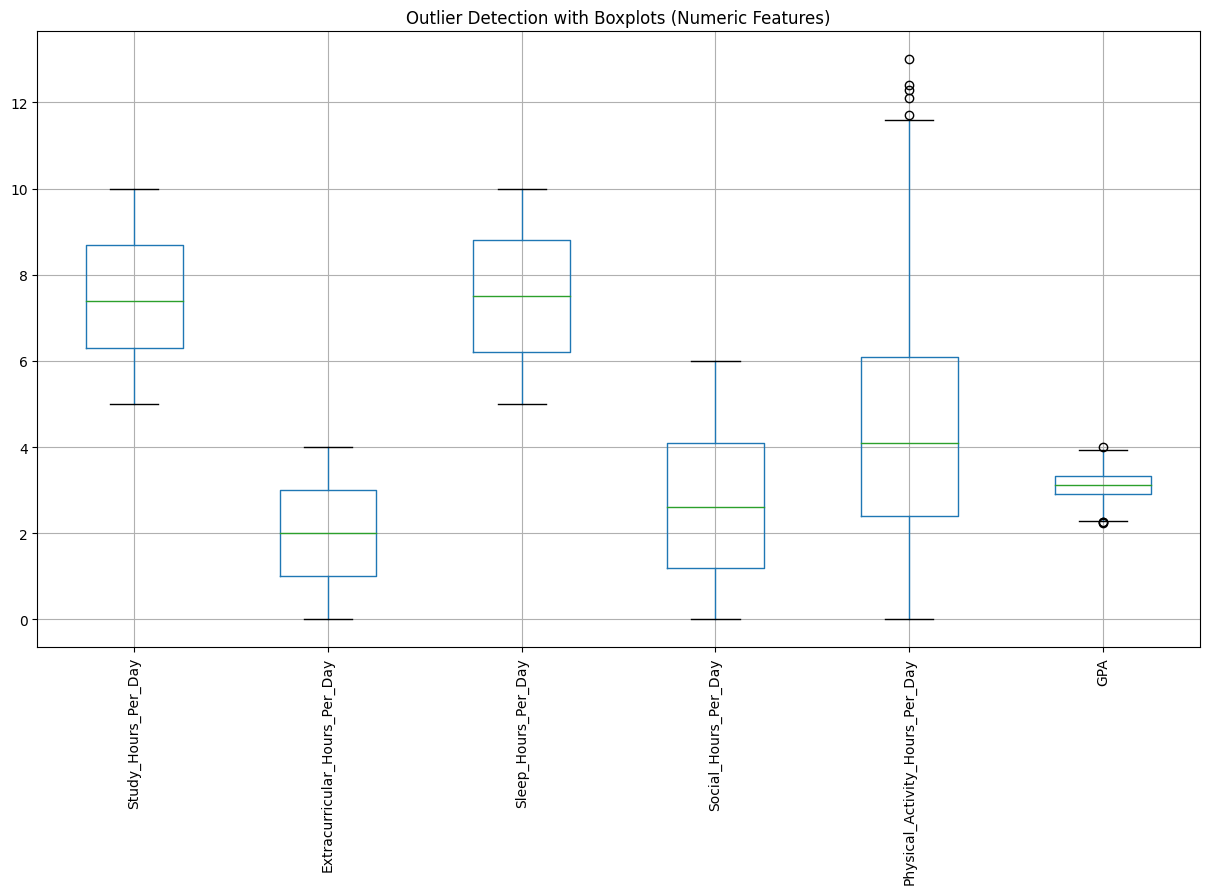

In [9]:
# --- Outlier detection using boxplots ---
plt.figure(figsize=(15, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Outlier Detection with Boxplots (Numeric Features)")
plt.show()

**Detecting Outlier in Each Column**

There are a **few outliers** found in the `Physical_Activity_Hours_Per_Day` and `GPA` variable. These outliers are essential for further analysis and modelling. Thus, it is **not removed** from the dataset.

In [10]:
df_enc = df.copy()
df_enc['Stress_Level'] = df_enc['Stress_Level'].map({'High': 2, 'Moderate': 1, 'Low': 0})
df_enc

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0
3,6.5,2.1,7.2,1.7,6.5,2.88,1
4,8.1,0.6,6.5,2.2,6.6,3.51,2
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,3.32,1
1996,6.3,2.8,8.8,1.5,4.6,2.65,1
1997,6.2,0.0,6.2,0.8,10.8,3.14,1
1998,8.1,0.7,7.6,3.5,4.1,3.04,2


**Label Encoding for `Stress_Level` Column**

The `Stress_Level` column is encoded using **label encoding** because its unique values (Low, Moderate, High) are considered as **ordinal categories**.

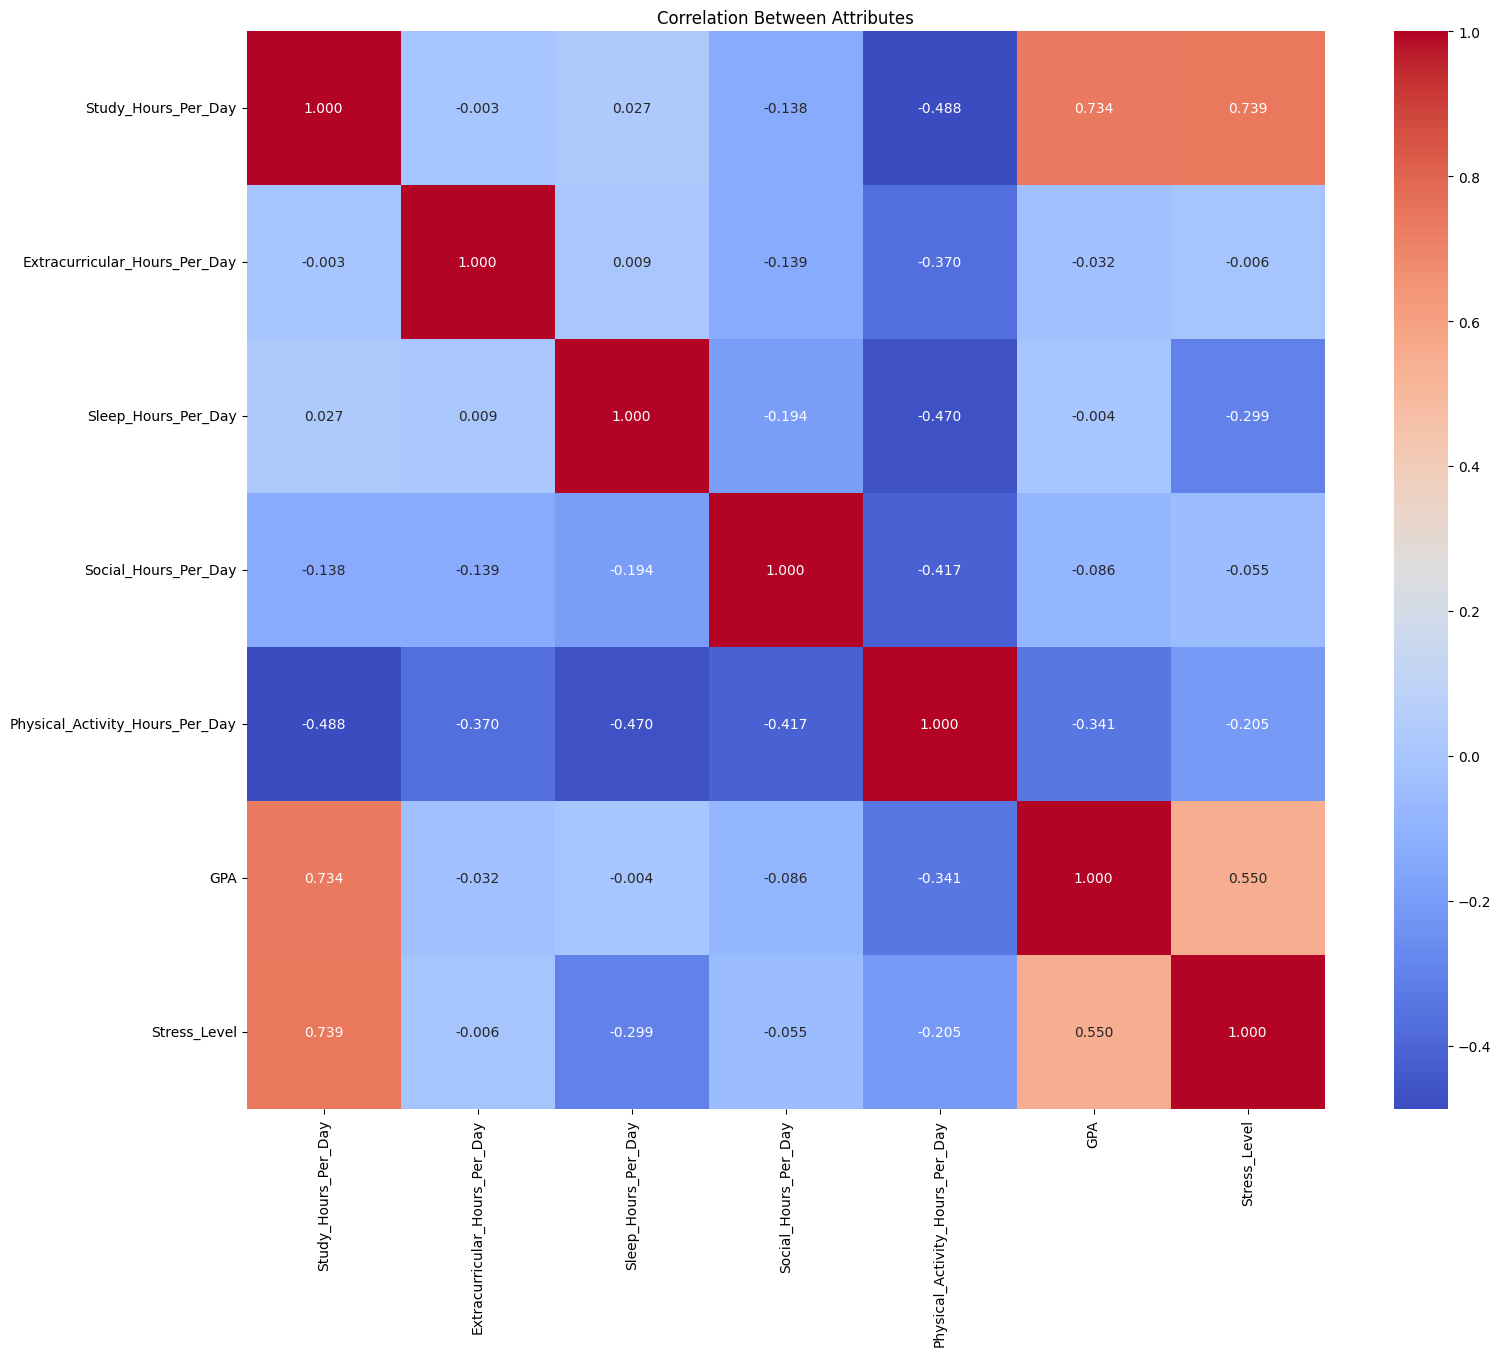

In [11]:
# Correlation matrix using heatmap
correlation_matrix = df_enc.corr()

# Display the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', square=True)
plt.title('Correlation Between Attributes')
plt.show()

### Insights from The Heat Map

**1. `Study_Hours_per_Day` and `GPA`**

* There is a **strong positive correlation** between the two variables **(0.734)**.
* This correlation indicates that students who study more tend to achieve a higher GPA.

**2. `Study_Hours_per_Day` and `Stress_Level`**

* There is a **strong positive correlation** between the two variables **(0.739)**.
* This correlation indicates that students who study more tend to experience higher levels of stress.

**3. `Extracurricular_Hours_per_Day` and `Stress_Level`**

* There is **essentially no correlation** between the two variables **(-0.006)**.
* This means that the variable `Extracurricular_Hours_per_Day` does not have an impact towards the target variable `Stress_Level`.

**4. `Sleep_Hours_per_Day` and `Stress_Level`**

* There is a **weak negative correlation** between the two variables **(-0.299)**.
* This weak correlation indicates that students who sleeps more might experience less stress.

**5. `Social_Hours_per_Day` and `Stress_Level`**

* There is **essentially no correlation** between the two variables **(-0.055)**.
* This means that the variable `Social_Hours_per_Day` does not have an impact towards the target variable `Stress_Level`.

**6. `Physical_Activity_Hours_per_Day` and `Stress_Level`**

* There is a **weak negative correlation** between the two variables **(-0.205)**.
* This weak correlation indicates that students who does more physical active might experience less stress.

**7. `GPA` and `Stress_Level`**

* There is a **moderate positive correlation** between the two variables **(0.550)**.
* This correlation indicates that students who achieve a higher GPA tend to have higher levels of stress.

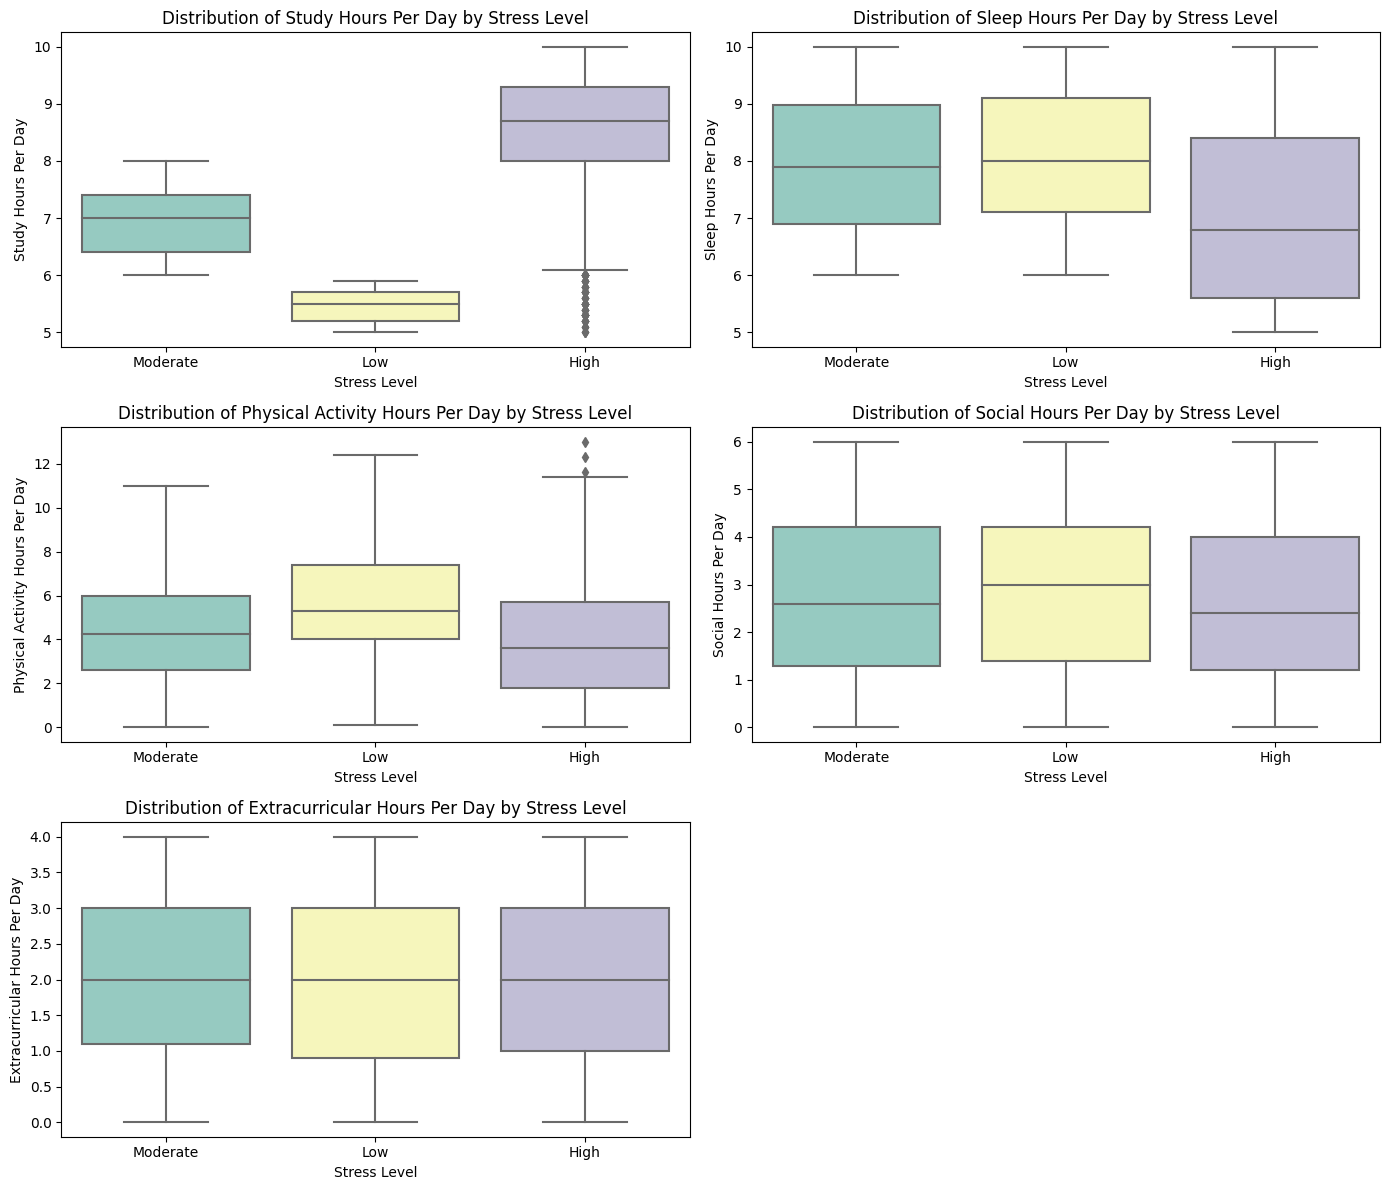

In [12]:
# Daftar fitur numerik
numerical_features = [
    'Study_Hours_Per_Day',
    'Sleep_Hours_Per_Day',
    'Physical_Activity_Hours_Per_Day',
    'Social_Hours_Per_Day',
    'Extracurricular_Hours_Per_Day'
]

# Buat subplot otomatis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()  # biar bisa diakses pakai indeks 0,1,2,...

# Looping tiap fitur
for idx, feature in enumerate(numerical_features):
    sns.boxplot(
        data=df,
        x="Stress_Level",
        y=feature,
        ax=axes[idx],
        palette="Set3"
    )
    axes[idx].set_title(f"Distribution of {feature.replace('_', ' ')} by Stress Level")
    axes[idx].set_xlabel("Stress Level")
    axes[idx].set_ylabel(feature.replace("_", " "))

# Buang subplot kosong (karena 3x2 = 6, tapi fitur cuma 5)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Insights from The Distribution of Each Column

**1. Study Hours per Day**

* Students in the **high-stress group** spend significantly more time studying, with both a higher median and wider spread. This suggests that heavy academic commitment is a key contributor to stress.
* The **moderate-stress group** falls in the middle, studying more than low-stress students but less than those under high stress.
* **Low-stress students** report the fewest study hours, which may reflect a more relaxed approach to academics.

**2. Sleep Hours per Day**

* Sleep duration appears relatively consistent across all groups, though the **high-stress group** shows a slightly higher median.
* Overall, **sleep patterns do not seem to be a strong differentiator** of stress levels.

**3. Physical Activity Hours per Day**

* Students with **low or moderate stress** are more engaged in physical activity, possibly using exercise as a coping mechanism.
* Those with **high stress** record less physical activity, likely due to study commitments taking priority.

**4. Social Hours per Day**

* **Socializing remains fairly stable** across stress levels, with similar medians and distributions in all groups.
* This indicates that stress does not significantly alter how much time students spend with peers.

**5. Extracurricular Hours per Day**

* Participation in extracurricular activities also shows **minimal variation** among the three groups.
* This suggests that involvement in such activities is not strongly influenced by stress levels.

---

### Summary

* **Study time** is the most closely tied to stress: the more hours spent studying, the higher the stress level.
* **Physical activity** is more common among students with lower or moderate stress, while highly stressed students are less active.
* **Sleep, socializing, and extracurricular activities** display little variation across stress categories, suggesting they have less direct impact on stress compared to study and exercise habits.

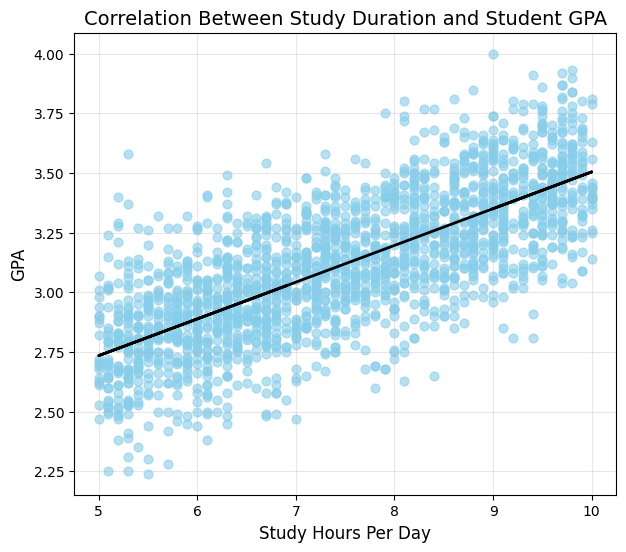

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 6))

# Scatter plot dengan warna lebih jelas (biru pastel)
plt.scatter(
    df['Study_Hours_Per_Day'],
    df['GPA'],
    color="skyblue",   # ganti warna dots
    alpha=0.6,
    s=40
)

# Tambah garis regresi sederhana
x = df['Study_Hours_Per_Day']
y = df['GPA']
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(x, poly1d_fn(x), color='black', linewidth=2)

# Judul dan label
plt.title('Correlation Between Study Duration and Student GPA', fontsize=14)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('GPA', fontsize=12)

plt.grid(alpha=0.3)
plt.show()

### Insights from The Scatter Plot

* The scatter plot indicates a **clear upward trend**: students who allocate more hours to studying tend to achieve higher GPAs. 
* There is some spread in GPA values for students who study fewer hours, the distribution becomes tighter at higher study hours, which could imply that **dedicated study time not only improves GPA but also reduces inconsistency** in academic outcomes.
* In short, regular study habits appear to be both beneficial and stabilizing for performance.


 == GPA Distribution by Stress Level ==
               Low Stress Moderate Stress  High Stress
GPA_Category                                          
2.0-2.5         21 (7.1%)       10 (1.5%)     6 (0.6%)
2.5-3.0       223 (75.1%)     307 (45.5%)  167 (16.2%)
3.0-3.5        52 (17.5%)     352 (52.2%)  658 (63.9%)
3.5-4.0          1 (0.3%)        5 (0.7%)  198 (19.2%)


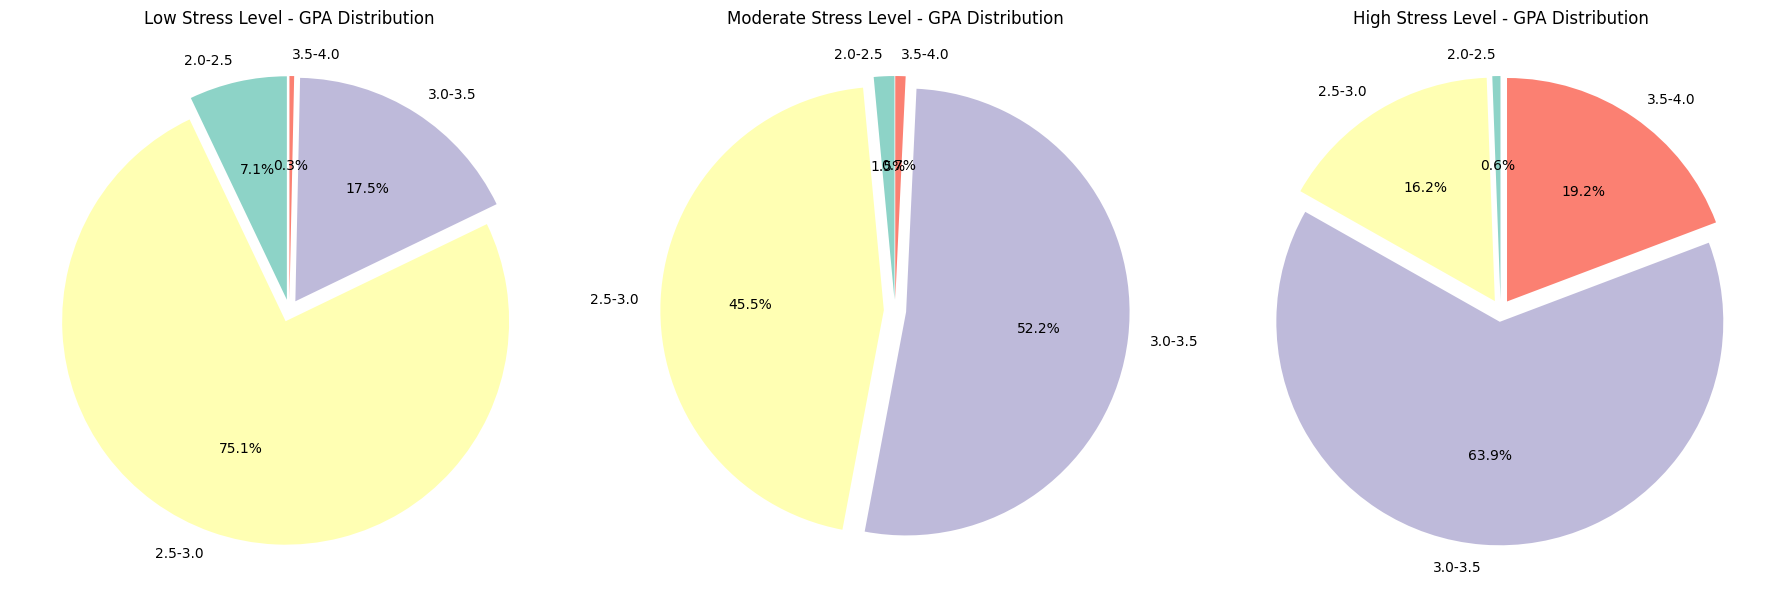

In [14]:
# --- Define GPA categories ---
bins = [2.0, 2.5, 3.0, 3.5, 4.0]
labels = ['2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0']

df['GPA_Category'] = pd.cut(df['GPA'], bins=bins, labels=labels, include_lowest=True)

# --- Filter by stress level ---
low_stress_level = df[df['Stress_Level'] == 'Low']
moderate_stress_level = df[df['Stress_Level'] == 'Moderate']
high_stress_level = df[df['Stress_Level'] == 'High']

# --- Count distribution per GPA category ---
low_counts = low_stress_level['GPA_Category'].value_counts().sort_index()
moderate_counts = moderate_stress_level['GPA_Category'].value_counts().sort_index()
high_counts = high_stress_level['GPA_Category'].value_counts().sort_index()

# --- Convert to DataFrame for table ---
table_df = pd.DataFrame({
    "Low Stress": low_counts,
    "Moderate Stress": moderate_counts,
    "High Stress": high_counts
}).fillna(0).astype(int)

# Add percentages
table_df_pct = table_df.div(table_df.sum(axis=0), axis=1) * 100
table_with_pct = table_df.astype(str) + " (" + table_df_pct.round(1).astype(str) + "%)"

print("\n == GPA Distribution by Stress Level ==")
print(table_with_pct)

# --- Plot pie charts ---
plt.figure(figsize=(18, 6))

# Low Stress
plt.subplot(1, 3, 1)
low_counts.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette("Set3", 4),
    startangle=90,
    explode=[0.05]*len(low_counts),
    labels=low_counts.index
)
plt.title('Low Stress Level - GPA Distribution')
plt.ylabel('')

# Moderate Stress
plt.subplot(1, 3, 2)
moderate_counts.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette("Set3", 4),
    startangle=90,
    explode=[0.05]*len(moderate_counts),
    labels=moderate_counts.index
)
plt.title('Moderate Stress Level - GPA Distribution')
plt.ylabel('')

# High Stress
plt.subplot(1, 3, 3)
high_counts.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette("Set3", 4),
    startangle=90,
    explode=[0.05]*len(high_counts),
    labels=high_counts.index
)
plt.title('High Stress Level - GPA Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

### Insights from the GPA of Low, Moderate and High Stress Level Students¶
1. Low Stress Students's GPA Distribution

* **The majority of students with low stress fall in the 2.5–3.0 GPA range (75.1%)**, while 17.5% achieve 3.0–3.5. Only 0.3% reach the top tier (3.5–4.0).
* Very few students excel at higher GPAs when stress is too low. This suggests that **insufficient academic pressure may reduce motivation**, resulting in mostly average performance.

2. Moderate Stress Students's GPA Distribution

* Students with moderate stress have a **more balanced GPA distribution**. About 45.5% are in the 2.5–3.0 range, while the **majority (52.2%) achieve 3.0–3.5**. Only a small fraction (0.7%) reach 3.5–4.0.
* Moderate stress appears to create **the most consistent and stable academic performance**, with very few students falling into the lowest GPA range.
* Compared to low-stress students, the proportion achieving GPA above 3.0 is much higher (52.9% vs. 17.8%). However, the very top achievers (3.5–4.0) remain rare, showing that **moderate stress may optimize stability but not push most students to peak performance**.

3. High Stress Students's GPA Distribution

* A large portion of highly stressed students achieve 3.0–3.5 GPA (63.9%), and a remarkable 19.2% reach the highest GPA range (3.5–4.0), which is much **higher compared to the other groups's GPA**.
* **High stress is strongly correlated with higher academic achievement**, likely because strong academic pressure drives students to perform better.
* However, 16.2% still remain in the 2.5–3.0 range, and 0.6% even fall into the lowest GPA category. This indicates that while **high stress can push many students toward excellence, it can also overwhelm others**, leading to academic struggles.

---

 ### Summary
* Low stress : average outcomes, some underperformance
* Moderate stress : balanced and stable outcomes, fewer extremes
* High stress : best results for many, but also higher risk of failure for some

In [15]:
from scipy import stats

# Cramer's V method to check the correlation between categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - 1
    kcorr = k - 1
    return np.sqrt(phi2corr / min((kcorr, rcorr)))

# Check the correlation
cramers1 = cramers_v(df_enc['Stress_Level'], df_enc['Study_Hours_Per_Day'])
print(f'Cramér\'s V between Stress_Level and Study_Hours_Per_Day: {cramers1:.3f}')

cramers2 = cramers_v(df_enc['Stress_Level'], df_enc['Extracurricular_Hours_Per_Day'])
print(f'Cramér\'s V between Stress_Level and Extracurricular_Hours_Per_Day: {cramers2:.3f}')

cramers3 = cramers_v(df_enc['Stress_Level'], df_enc['Sleep_Hours_Per_Day'])
print(f'Cramér\'s V between Stress_Level and Sleep_Hours_Per_Day: {cramers3:.3f}')

cramers6 = cramers_v(df_enc['Stress_Level'], df_enc['Social_Hours_Per_Day'])
print(f'Cramér\'s V between Stress_Level and Social_Hours_Per_Day: {cramers6:.3f}')

cramers4 = cramers_v(df_enc['Stress_Level'], df_enc['Physical_Activity_Hours_Per_Day'])
print(f'Cramér\'s V between Stress_Level and Physical_Activity_Hours_Per_Day: {cramers4:.3f}')

cramers5 = cramers_v(df_enc['Stress_Level'], df_enc['GPA'])
print(f'Cramér\'s V between Stress_Level and GPA: {cramers5:.3f}')

Cramér's V between Stress_Level and Study_Hours_Per_Day: 0.822
Cramér's V between Stress_Level and Extracurricular_Hours_Per_Day: 0.000
Cramér's V between Stress_Level and Sleep_Hours_Per_Day: 0.341
Cramér's V between Stress_Level and Social_Hours_Per_Day: 0.000
Cramér's V between Stress_Level and Physical_Activity_Hours_Per_Day: 0.195
Cramér's V between Stress_Level and GPA: 0.416


### Insights from The Cramér's V Correlation Test

**1. `Study_Hours_per_Day` and `Stress_Level`**

* There is a **very strong association** between the two variables **(0.822)**.
* This strong relationship indicates that the two variables are **highly dependent** on each other. It means the variable `Study_Hours_per_Day` is an important predictor for the target variable `Stress_Level`.

**2. `Extracurricular_Hours_per_Day` and `Stress_Level`**

* There is **no association** between the two variables **(0.000)**.
* This means that the two variables are independent and the variable `Extracurricular_Hours_per_Day` does not have an impact towards the target variable `Stress_Level`.

**3. `Sleep_Hours_per_Day` and `Stress_Level`**

* There is a **moderate association** between the two variables **(0.341)**.
* This moderate association indicates that there might be a meaningful connection between students' sleeping duration and their level of stress. The variable `Sleep_Hours_per_Day` is a fairly good predictor of `Stress_Level`.

**4. `Social_Hours_per_Day` and `Stress_Level`**

* There is **no association** between the two variables **(0.000)**.
* This means that the two variables are independent and the variable `Social_Hours_per_Day` does not have an impact towards the target variable `Stress_Level`.

**5. `Physical_Activity_Hours_per_Day` and `Stress_Level`**

* There is a **weak association** between the two variables **(0.195)**.
* This weak association indicates that the variable `Physical_Activity_Hours_per_Day` has low predictive power towards the target variable `Stress_Level`.

**6. `GPA` and `Stress_Level`**

* There is a **moderate association** between the two variables **(0.416)**.
* This moderate association indicates that there might be a meaningful connection between students' academic performance (GPA) and their level of stress. The variable `GPA` is a fairly good predictor of `Stress_Level`.

# Splitting Data

In [16]:
SEED = 123

input_df = df_enc.drop(['Stress_Level'], axis=1)
output_df = df_enc['Stress_Level']

x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = SEED)

print("shape X_train: ",x_train.shape)
print("shape X_test: ",x_test.shape)
print("shape y_train: ",y_train.shape)
print("shape y_test: ",y_test.shape)

shape X_train:  (1600, 6)
shape X_test:  (400, 6)
shape y_train:  (1600,)
shape y_test:  (400,)


The dataset is separated into two parts which is training data and testing data.

**Random Seed**
* By setting SEED = 123, the data split process will be consistent every time the code is executed. 

**Variable Separation**
* input_df contains all the independent variables (features) used to predict stress levels.
* output_df holds the target variable, Stress_Level, which the model is trained to learn and predict.

**Splitting Process**
* The train_test_split function is applied to divide the dataset into training and testing sets
* 80% is allocated to the training set (x_train, y_train) so the model can learn patterns from the data.
* 20% is reserved for the testing set (x_test, y_test) to evaluate how well the model performs on unseen data.

# Modelling

## Decision Tree Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

RF_class = RandomForestClassifier(random_state=SEED)
RF_class.fit(x_train, y_train)
y_predict_RF = RF_class.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_predict_RF))
print("\nClassification Report:\n", classification_report(y_test, y_predict_RF))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predict_RF))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       193

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:
 [[ 63   0   0]
 [  0 144   0]
 [  0   0 193]]


**Why this model was chosen**
* The student lifestyle dataset contains categorical features (e.g., study habits, sleep quality, diet, exercise) that influence stress levels. Decision Trees handle categorical and numerical data very well without heavy preprocessing.
* Since stress levels are divided into discrete categories (0 = low, 1 = medium, 2 = high), a Decision Tree Model can split the dataset into clear “rules.” For example:
If sleep_hours < 5 and exercise = no → High Stress &
If balanced_diet = yes and study_time = moderate → Low Stress
* This makes it interpretable to see why a student is classified into a certain stress level.

**Output interpretation**
* The model reached 100% accuracy, meaning all 400 students in the test set were classified correctly.
* The classification report shows perfect precision, recall, and F1-score across all classes (0, 1, 2), suggesting the features strongly separate students into clear stress categories.
* The confusion matrix confirms this—every student was predicted in the right stress level group.

## Random Forest Classifier

In [18]:
DT_class = DecisionTreeClassifier(random_state=SEED)
DT_class.fit(x_train, y_train)
y_predict_DT = DT_class.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_predict_DT))
print("\nClassification Report:\n", classification_report(y_test, y_predict_DT))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predict_DT))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       193

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:
 [[ 63   0   0]
 [  0 144   0]
 [  0   0 193]]


**Why this model was chosen**
* The student lifestyle dataset may contain overlapping patterns (e.g., two students with similar study hours but different stress levels due to diet or sleep). A single Decision Tree might overfit to small variations.
* Random Forest, by combining multiple trees, reduces overfitting and improves stability. 
* This makes the model more robust for later deployment process, where it might encounter new, unseen student data.

**Output interpretation**
* Like Decision Tree, Random Forest achieved 100% accuracy.
* The classification report and confusion matrix again show perfect classification across all groups, meaning no student stress level was misclassified.

## **Comparison between Decision Tree Classifier and Random Forest Classifier**

**Decision Tree**
* Accuracy: 100%
* Interpretability: Can show clear lifestyle rules (e.g., lack of sleep → high stress).
* Generalization: May overfit if new students have slightly different lifestyles.
* Deployment: Faster and easier to explain predictions.

**Random Forest**
* Accuracy: 100%
* Interpretability: Harder to interpret due to many trees.
* Generalization: More stable for deployment since it averages multiple trees.
* Deployment: More reliable in the long run if dataset grows.

# Feature Importance

Text(0, 0.5, 'Features')

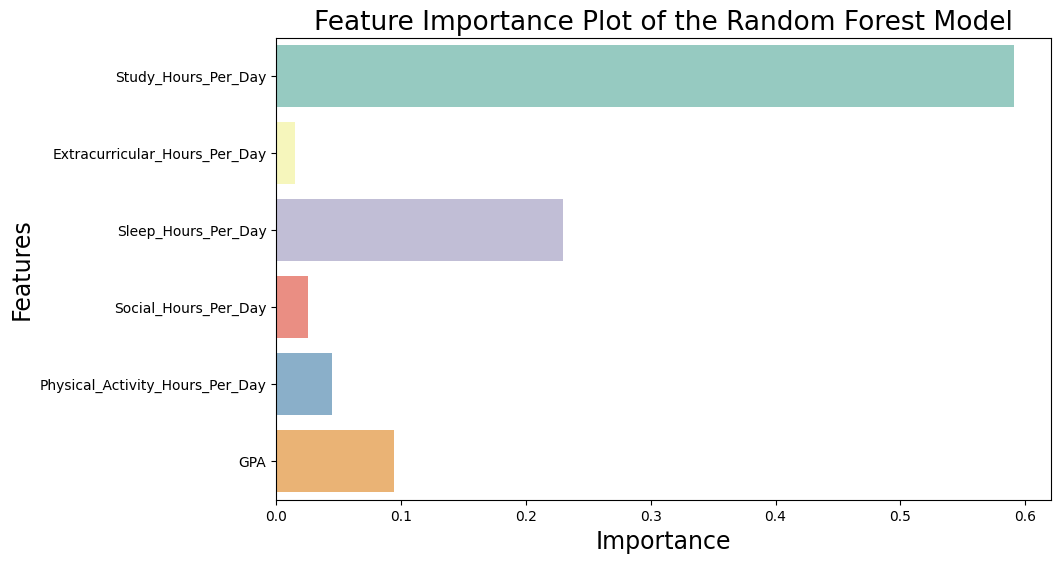

In [19]:
importances_rf = RF_class.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances_rf, y=feature_names, palette='Set3')
plt.title('Feature Importance Plot of the Random Forest Model', fontsize=19)
plt.xlabel('Importance', fontsize=17)
plt.ylabel('Features', fontsize=17)

### Insights from the Feature Importance Plot of the Random Forest Model
1. **Study Hours per Day** : This factor stands out as the strongest contributor. The number of hours spent studying is highly associated with stress intensity, where longer study durations often lead to higher stress.

2. **Sleep Hours per Day** : Ranked second in importance, sleep shows an inverse connection with stress. Students who sleep fewer hours are more prone to elevated stress levels.

3. **GPA** : Academic achievement also plays a meaningful role. Higher GPA students may experience distinct stress dynamics, often linked to performance expectations and academic pressure.

4. **Physical Activity per Day** : This feature provides a moderate effect. Engaging in regular physical exercise helps to ease stress, aligning with its well-documented benefits for mental well-being.

5. **Social and Extracurricular Hours per Day** : These two factors were identified as the least impactful. Time spent on socializing or extracurricular activities seems to exert minimal direct influence on stress levels, likely because students allocate far fewer hours here compared to study or sleep.

Text(0, 0.5, 'Features')

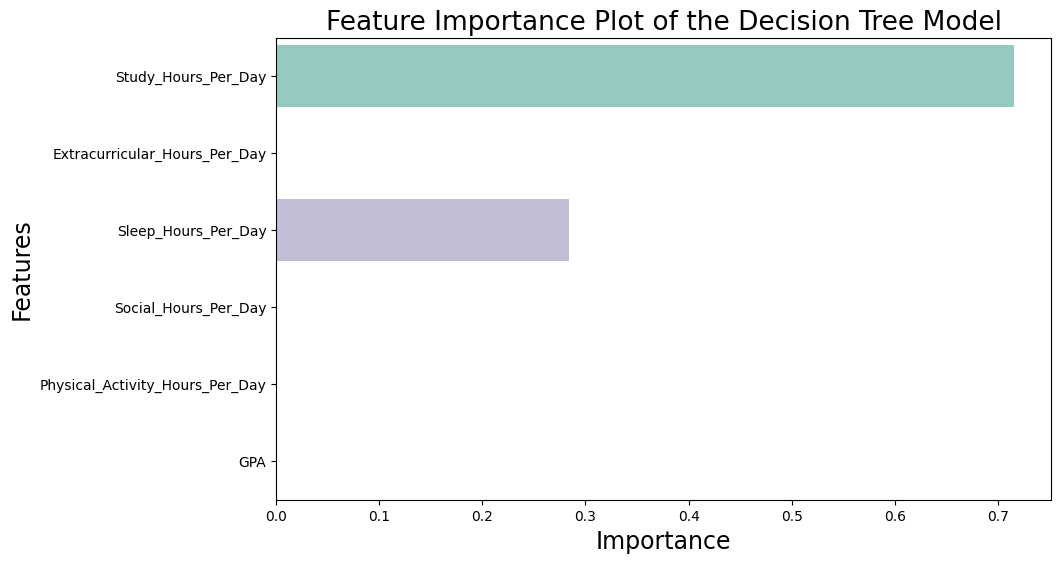

In [20]:
importances_dt = DT_class.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances_dt, y=feature_names, palette='Set3')
plt.title('Feature Importance Plot of the Decision Tree Model', fontsize=19)
plt.xlabel('Importance', fontsize=17)
plt.ylabel('Features', fontsize=17)

### Insights from the Feature Importance Plot of the Decision Tree Model

1. **Study Hours per Day**

* This feature is by far **the most important predictor in the Decision Tree model**.
* Students who dedicate more hours to studying have stress levels that the model can best explain.
* It suggests that academic workload is the dominant factor influencing stress in this dataset.

2. **Sleep Hours per Day**

* **Ranked second in importance**, though much lower than study hours.
* Sleep duration still plays a role, with **reduced sleep often linked to increased stress**.
* However, compared to study hours, its impact is less pronounced in this model.

3. **Other Features (Extracurricular, Social, Physical Activity, GPA)**

* These variables are assigned **negligible or zero importance**.
* The Decision Tree model largely ignores them when predicting stress levels, meaning their influence is minimal compared to study and sleep hours.

### Comparison of Decision Tree vs. Random Forest Feature Importance

1. **Dominant Factor**

* Both models highlight Study Hours per Day as the most influential variable.
* However, in the Decision Tree, study hours completely dominate, while the Random Forest still assigns importance to other features.

2. **Sleep Hours**

* Present as the second-most important in both models.
* In the Random Forest, sleep has a more balanced role, whereas in the Decision Tree, it is significant but overshadowed by study hours.

3. **GPA**

* In the Random Forest, GPA contributes meaningfully to stress prediction.
* In the Decision Tree, GPA’s contribution is negligible, suggesting the tree did not split effectively on this variable.

4. **Physical Activity, Social, and Extracurricular Hours**

* Random Forest assigns them some (albeit small) importance.
* Decision Tree considers them irrelevant, reflecting the model’s tendency to focus only on the most “decisive” splits.